In [649]:
from scipy import integrate
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib import pyplot as plt      
import pandas as pd
from scipy import special                 
import array
import scipy as sp
import scipy.interpolate
import re
import pickle as pickle
from concurrent.futures import ProcessPoolExecutor
import h5py

In [650]:
input_redshift = 5.88#input('Enter redshift')
# input_file_path = "/data/hqchen/mfp/sp17_1.4e+57_F_a01452_xT.hdf5"#input('Filepath?')
# input_light_ray = 'lightray_h7429295_n4'#input('which light ray?')
# input_year = 'los.info'
# file = h5py.File("/data/hqchen/mfp/sp17_1.4e+57_F_a01452_xT.hdf5")
#background_gamma is calculated here
input_background_density = 10**(-24.5) *3.08e24
input_xi_value = 0.67

below can be used to calculate the background gamma from los directly if necessary

In [651]:

# def calculate_gamma_e(T):
#     gamma_e = []
#     for i in T:
#         if i <10:
#             gamma_e.append(0)
#         else:
#             t5 = i/1e5
#             egamma = 1.17e-10*i**0.5 * np.e**(-177809.1/i)/(1+(t5)**.5)
#             gamma_e.append(egamma)
#     return gamma_e


# def calculate_alpha(T):
#     eV2rg =  1.60217648740e-12
#     boltzmann_constant = 1.380649e-16
#     alpha_list = []
#     for i in T:
#         T_bar =  float(boltzmann_constant*i/eV2rg)
#         alpha = (np.e**(-28.6130338-0.72411256*np.log(T_bar) -2.02604473e-2*np.power(np.log(T_bar),2) - 2.38086188e-3*np.power(np.log(T_bar),3) -3.21260521e-4*np.power(np.log(T_bar),4) - 1.42150291e-5*np.power(np.log(T_bar),5) +4.98910892e-6*np.power(np.log(T_bar),6) + 5.75561414e-7*np.power(np.log(T_bar),7) -1.85676704e-8*np.power(np.log(T_bar),8) - 3.07113524e-9*np.power(np.log(T_bar),9)) )
#         alpha_list.append(alpha)
#     return alpha_list

# def value_array(file_path,lightray,year):
#     file = h5py.File(file_path)
#     dset = file[lightray]
#     distance = np.array(pd.to_numeric([i[0] for i in dset[year]]))
#     H_density = [i[2] for i in dset['los.info']]
#     #get the HII by subtracting 1- neutral fraction of HI, and then multiply by the total H number density
#     HII_density = np.array(pd.to_numeric(np.multiply([i[2] for i in dset[year]], np.subtract(1,[i[4] for i in dset['los.info']]))))
#     x_HII =  np.subtract(1,[i[4] for i in dset['los.info']])
#     x_HI =  [i[4] for i in dset['los.info']]
#     Temperature = pd.to_numeric([i[7] for i in dset[year]])
#     gamma_e = calculate_gamma_e(Temperature)
#     alpha = calculate_alpha(Temperature)
#     frist_part = np.multiply(-HII_density,gamma_e)
#     second_part = np.divide(np.multiply(alpha,np.multiply(HII_density,x_HII)),x_HI)
#     quasar_background = np.add(frist_part,second_part)
#     return quasar_background

In [652]:
#this function assume constant background density, background gamma, 
#calculate the gamma from the function in becker, assme Req = 15, xi = 0.67 

#distance is in pMpc
distance = np.linspace(0.1,54.5,2001)
#create array of gamma_background
gamma_bkg = np.empty(2001); gamma_bkg.fill(1.29432734538763e-13)
Req =4

In [653]:
gamma_bkg

array([1.29432735e-13, 1.29432735e-13, 1.29432735e-13, ...,
       1.29432735e-13, 1.29432735e-13, 1.29432735e-13])

In [654]:
distance

array([ 0.1   ,  0.1272,  0.1544, ..., 54.4456, 54.4728, 54.5   ])

In [655]:
#this create the qso gamma_qso, this follows becker's equation
def gamma_qso(distance, gamma_bkg,Req):
    gamma_qso = []
    gamma_qso_first = gamma_bkg[0]*(distance[0]/Req)**-2

    gamma_qso.append(gamma_qso_first)
    for i in range(1,len(distance)):
        gamma_qso_first = gamma_qso_first *(distance[i]/distance[i-1])**-2*(np.e**(-input_background_density*(distance[i]-distance[i-1]))) # eq 8
        gamma_qso.append(gamma_qso_first)
    return gamma_qso

In [656]:
gamma_qso_list = gamma_qso(distance,gamma_bkg,Req)

In [657]:
gamma_bkg[0]

1.29432734538763e-13

Text(0, 0.5, 'gamma_qso')

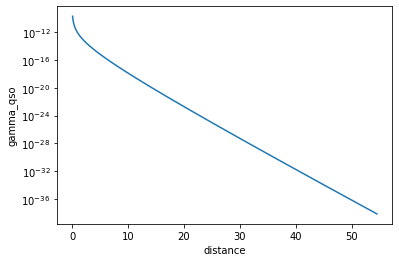

In [658]:
plt.plot (distance,gamma_qso_list)
plt.yscale('log')
plt.xlabel("distance")
plt.ylabel("gamma_qso")

In [659]:
def kappa_912_value(bg_kappa,gamma_qso,distance,xi):
    kappa_912 = []
    kappa_graph = []
    distance_graph = []
    for i,z in zip(gamma_qso,distance):
        k_912_temp = bg_kappa*(1+i/1.29432734538763e-13 )**(-xi)
        kappa_912.append(k_912_temp)
    return kappa_912

In [660]:
kappa_912 = kappa_912_value(input_background_density,gamma_qso_list,distance,input_xi_value)

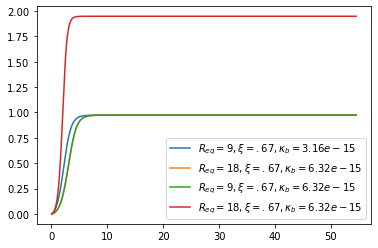

In [661]:
input_redshift = 5.88
input_background_density = 10**(-24.5) *3.08e24
input_xi_value = 0.67
Req = 9
gamma_qso_list = gamma_qso(distance,gamma_bkg,Req)
kappa_912 = kappa_912_value(input_background_density,gamma_qso_list,distance,input_xi_value)
plt.plot(distance,kappa_912,label=r"$R_{eq} = 9, \xi = .67, \kappa_{b} = 3.16e-15$")
plt.legend()
input_redshift = 5.88
input_background_density = 10**(-24.5) *3.08e24*2
input_xi_value = 0.67
Req = 9
input_redshift = 5.88
input_background_density = 10**(-24.5) *3.08e24
input_xi_value = 0.67
Req = 18
gamma_qso_list = gamma_qso(distance,gamma_bkg,Req)
kappa_912 = kappa_912_value(input_background_density,gamma_qso_list,distance,input_xi_value)
plt.plot(distance,kappa_912,label=r"$R_{eq} = 18, \xi = .67, \kappa_{b} = 6.32e-15$")
plt.legend()
gamma_qso_list = gamma_qso(distance,gamma_bkg,Req)
kappa_912 = kappa_912_value(input_background_density,gamma_qso_list,distance,input_xi_value)
plt.plot(distance,kappa_912,label=r"$R_{eq} = 9, \xi = .67, \kappa_{b} = 6.32e-15$")
plt.legend()
input_redshift = 5.88
input_background_density = 10**(-24.5) *3.08e24*2
input_xi_value = 0.67
Req = 18
gamma_qso_list = gamma_qso(distance,gamma_bkg,Req)
kappa_912 = kappa_912_value(input_background_density,gamma_qso_list,distance,input_xi_value)
plt.plot(distance,kappa_912,label=r"$R_{eq} = 18, \xi = .67, \kappa_{b} = 6.32e-15$")
plt.legend()

Below is the wrong way doing it

In [662]:
def change_to_redshift(distance,redshift):
    '''change Cmpc to redshift, start at the redshift of the box'''
    distance_redshift = []
    distance_redshift.append(redshift)
    distance_difference = redshift
    for i in range(len(distance)-1):
        distance_difference -= (np.subtract(distance[i+1],distance[i])) / 50 * 0.772
        distance_redshift.append(distance_difference)
    return distance_redshift

def change_to_wavelength(redshift_distance,redshift):
    start_wavelength = 911.76
    wavelength = []
    for i in range(len(redshift_distance)):
        wavelength.append(911.76*(1+redshift_distance[i])/(1+redshift))
    return wavelength


In [663]:
distance_redshift = change_to_redshift(distance, 5.88)
wavelength = change_to_wavelength(distance_redshift,5.88)

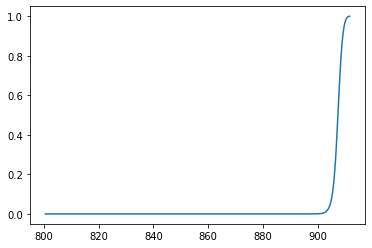

In [664]:
def tau_calculation(kappa_912,distance):
    kappa_graph = []
    distance_graph = []
    tau = []
    for i,z in zip(kappa_912,distance):
        kappa_graph.append(i)
        distance_graph.append(z)
        total_optical_depth = integrate.cumtrapz(kappa_graph,distance_graph,initial =0)
        tau.append(total_optical_depth[-1])
    return tau
tau = tau_calculation(kappa_912,distance)
tau[-1]
plt.plot(wavelength, np.exp(np.multiply(-1,tau)))


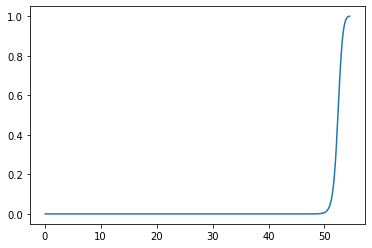

In [665]:
plt.plot(np.flip(distance), np.exp(np.multiply(-1,tau)) )

In [666]:
wavelength[-1]

800.4489466046238

In [667]:
tau[-1]

102.19587026930131

convert to redshift then the wavelength 

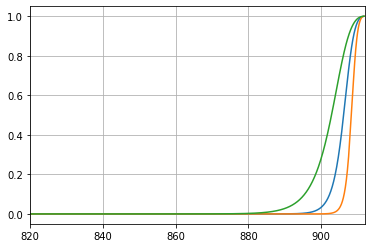

In [668]:
distance_redshift = change_to_redshift(distance, 5.88)
wavelength = change_to_wavelength(distance_redshift,5.88)
input_redshift = 5.88
input_background_density = 10**(-24.5) *3.08e24
input_xi_value = 0.67
Req = 9
gamma_qso_list = gamma_qso(distance,gamma_bkg,Req)
kappa_912 = kappa_912_value(input_background_density,gamma_qso_list,distance,input_xi_value)
tau = tau_calculation(kappa_912,distance)
plt.plot(wavelength, np.exp(np.multiply(-1,tau)))
plt.grid()
plt.xlim(820,912)
input_redshift = 5.88
input_background_density = 10**(-24.5) *3.08e24*2
input_xi_value = 0.67
Req = 9
gamma_qso_list = gamma_qso(distance,gamma_bkg,Req)
kappa_912 = kappa_912_value(input_background_density,gamma_qso_list,distance,input_xi_value)
tau = tau_calculation(kappa_912,distance)
plt.plot(wavelength, np.exp(np.multiply(-1,tau)))
plt.grid()
plt.xlim(820,912)
input_redshift = 5.88
input_background_density = 10**(-24.5) *3.08e24/2
input_xi_value = 0.67
Req = 9
gamma_qso_list = gamma_qso(distance,gamma_bkg,Req)
kappa_912 = kappa_912_value(input_background_density,gamma_qso_list,distance,input_xi_value)
tau = tau_calculation(kappa_912,distance)
plt.plot(wavelength, np.exp(np.multiply(-1,tau)))
plt.grid()

In [669]:
tau[-1]

24.902623194971657

In [670]:
from astropy.cosmology import WMAP9 as cosmo
from astropy.constants import c as clight
zqso=1/0.1452-1
Hz=cosmo.H(zqso).value
H0=cosmo.H(0).value

In [671]:
Hz

673.86021395076

Huanqing's code

In [672]:
input_redshift = 5.88
input_background_density = 10**(-24.5) *3.08e24
input_xi_value = 0.67
Req = 9
def tau_LyC(wv_rest,Req,input_xi_value,input_background_density,input_redshift):
    z912 = wv_rest/911.76*(1+input_redshift) -1
    ngrid = 2001
    dzpArr=np.ones(ngrid)*(input_redshift-z912)/ngrid
    zpArr=z912+(np.cumsum(dzpArr)-dzpArr[0]/2)
    drArr=dzpArr/Hz*clight.to("km/s").value/(1+zqso)
    gamma_qso_list = gamma_qso(np.cumsum(drArr),gamma_bkg,Req)
    kappa_912 = kappa_912_value(input_background_density,gamma_qso_list,distance,input_xi_value)
    integ=(np.sum(kappa_912*(1+zpArr)**(-5.25)*dzpArr))
    tau_eff=clight.to("km/s").value/H0/cosmo.Om0**0.5*(1+z912)**2.75*integ
#     if debug==True:
#         return drArr,kap_zp,tau_eff
    return tau_eff

checking the difference

/tmp/ipykernel_4270/1170956889.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  gamma_qso_first = gamma_bkg[0]*(distance[0]/Req)**-2
/tmp/ipykernel_4270/1170956889.py:8: RuntimeWarning: invalid value encountered in double_scalars
  gamma_qso_first = gamma_qso_first *(distance[i]/distance[i-1])**-2*(np.e**(-input_background_density*(distance[i]-distance[i-1]))) # eq 8


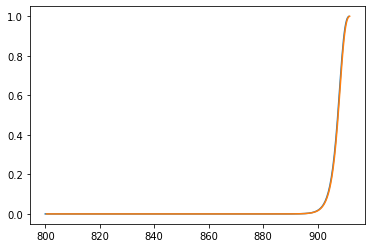

In [673]:
wv_rest_arr=np.linspace(911.76,800,400)
Req=4 #pMpc
xi=0.67

tau_arr=np.array([tau_LyC(wv,Req,xi,input_background_density,input_redshift) for wv in wv_rest_arr])
plt.plot(wv_rest_arr,np.exp(-tau_arr))
distance_redshift = change_to_redshift(distance, 5.88)
wavelength = change_to_wavelength(distance_redshift,5.88)
gamma_qso_list = gamma_qso(distance,gamma_bkg,Req)
kappa_912 = kappa_912_value(input_background_density,gamma_qso_list,distance,xi)
tau = tau_calculation(kappa_912,distance)
tau[-1]
plt.plot(wavelength, np.exp(np.multiply(-1,tau)))

/tmp/ipykernel_4270/1170956889.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  gamma_qso_first = gamma_bkg[0]*(distance[0]/Req)**-2
/tmp/ipykernel_4270/1170956889.py:8: RuntimeWarning: invalid value encountered in double_scalars
  gamma_qso_first = gamma_qso_first *(distance[i]/distance[i-1])**-2*(np.e**(-input_background_density*(distance[i]-distance[i-1]))) # eq 8


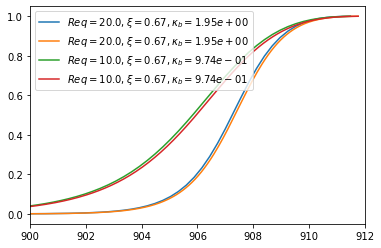

In [676]:
wv_rest_arr=np.linspace(911.76,800,400)
input_background_density = 10**(-24.5) *3.08e24*2
Req=20 #pMpc
kapbg = input_background_density/ 3.08e24
xi=0.67

tau_arr=np.array([tau_LyC(wv,Req,xi,input_background_density,input_redshift) for wv in wv_rest_arr])
plt.plot(wv_rest_arr,np.exp(-tau_arr),label=r"$Req={:3.1f},\xi={:4.2f},\kappa_b={:4.2e}$".format(Req,xi,input_background_density))
distance_redshift = change_to_redshift(distance, 5.88)
wavelength = change_to_wavelength(distance_redshift,5.88)
gamma_qso_list = gamma_qso(distance,gamma_bkg,Req)
kappa_912 = kappa_912_value(input_background_density,gamma_qso_list,distance,xi)
tau = tau_calculation(kappa_912,distance)
tau[-1]
plt.plot(wavelength, np.exp(np.multiply(-1,tau)),label=r"$Req={:3.1f},\xi={:4.2f},\kappa_b={:4.2e}$".format(Req,xi,input_background_density))
plt.xlim(900)
wv_rest_arr=np.linspace(911.76,800,400)
input_background_density = 10**(-24.5) *3.08e24
kapbg = input_background_density/ 3.08e24
Req=10 #pMpc
xi=0.67

tau_arr=np.array([tau_LyC(wv,Req,xi,input_background_density,input_redshift) for wv in wv_rest_arr])
plt.plot(wv_rest_arr,np.exp(-tau_arr),label=r"$Req={:3.1f},\xi={:4.2f},\kappa_b={:4.2e}$".format(Req,xi,input_background_density))
distance_redshift = change_to_redshift(distance, 5.88)
wavelength = change_to_wavelength(distance_redshift,5.88)
gamma_qso_list = gamma_qso(distance,gamma_bkg,Req)
kappa_912 = kappa_912_value(input_background_density,gamma_qso_list,distance,xi)
tau = tau_calculation(kappa_912,distance)
tau[-1]
plt.plot(wavelength, np.exp(np.multiply(-1,tau)),label=r"$Req={:3.1f},\xi={:4.2f},\kappa_b={:4.2e}$".format(Req,xi,input_background_density))
plt.xlim(900,912)
plt.legend()